# Day 2: Logistic Regression
We will apply logistic regression to binary classification problems. We will first jump in quickly to use sklearn (scikit-learn) to build a logistic regression model on a toy dataset. After this, we will work with a few datasets, some randomly generated (i.e. artificial) and some real-life data.

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.datasets import make_classification
from sklearn import metrics
from sklearn.metrics import *
from sklearn.cross_validation import cross_val_score

import pandas as pd
from patsy import dmatrices

import statsmodels.api as sm
from statsmodels.formula.api import logit, probit, poisson, ols

import seaborn as sns
sns.set(style="white")

In [1]:
from __future__ import print_function

NameError: name 'python' is not defined

#### Other metrics

The score reported by model.score is the accuracy of the classifier. What is the metric that we should be targeting or measuring our classifiers by?

The popular metrics are:
- Precision
- Recall 
- PR-AUC
- AUC (Area Under the ROC Curve)
- F1 score
- accuracy

Discuss the confusion matrix, and how these measures are computed. 
Link: https://en.wikipedia.org/wiki/Precision_and_recall

In [5]:
X = [(1, 2), (2, 3), (1, 3), (4, 5)]
y = np.random.randint(2, size = 4)
print(y)
model = LogisticRegression()
model = model.fit(X, y)
model.score(X, y)

[1 1 1 0]


1.0

## Round 1: A larger example

In [6]:
# template: make_classification(n_samples, n_features, n_informative, n_redundant, n_classes = 2, weights, random_state)
X, y = make_classification(300, 2, 2, 0, weights=[.6, .4], random_state=25)

In [7]:
# Train on 100 of the samples (the training set)
clf = LogisticRegression().fit(X[:150], y[:150])

In the above, change
- n_samples
- weights between the two classes
- random_state

and see the impact on
- accuracy as in clf.score
- plot of the test data.

In [8]:
# Plotting. 
# Check out 
# what xx, len(xx) is
# what np.c_ does

xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = clf.predict_proba(grid)[:, 1].reshape(xx.shape)
acc = clf.score(X[150:], y[150:])
print(acc)

0.886666666667


[(-5, 5),
 (-5, 5),
 None]

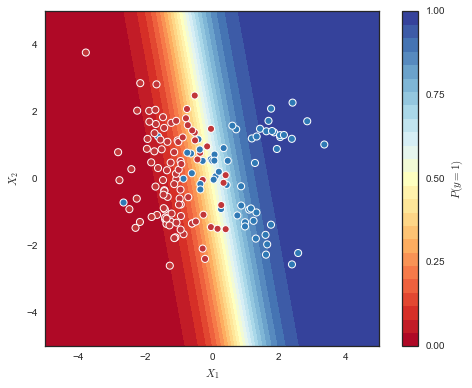

In [9]:
f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdYlBu",
                      vmin=0, vmax=1)

# Set up the contour bar
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

# Plot the outputs on the test data.
ax.scatter(X[150:,0], X[150:, 1], c=y[150:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(-5, 5), ylim=(-5, 5),
       xlabel="$X_1$", ylabel="$X_2$")

### Convexity of the objective function.

In [45]:
x = np.linspace(1, 6, 2000)

In [46]:
y = np.random.randint(2, size = len(x))
y = np.ones(len(x))

0.313261687518
0.69314718056


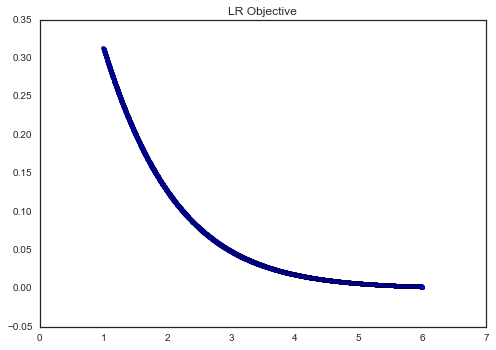

In [47]:
def obj_val(x, y):
    return -y*np.log(1/(1 + np.exp(-x))) - (1-y)*np.log(np.exp(-x)/(1 + np.exp(-x)))

i = 0
print(obj_val(x[i], y[i]))
print(obj_val(0, 0))

#vectorizing the computation.
obj_vectorized = np.vectorize(obj_val)
obj_values = obj_vectorized(x,y)

f, ax = plt.subplots()
ax.scatter(x, obj_values)
ax.set_title('LR Objective')
